# 離散ロジスティック型モデル

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.optimize import curve_fit

In [18]:
def sim(r, xi, T):
    """離散ロジスティックモデルのシミュレーションを行う
    
    Args:
        r (float): parameter
        xi (float): initial value
        T (int): end time
    Return (list): N(t)
    
    """
    res = [xi]
    for i in range(T):
        xin = r*xi*(1-xi)
        res.append(xin)
        xi = xin
    return np.array(res)

def plot(ax, r):
    x = np.linspace(0, 1)
    y = r*x*(1-x)
    ax.plot(x, y, c="C1")
    ax.plot(x, x, c="k")
    ax.set_xlabel("$N_t$")
    ax.set_ylabel("$N_{t+1}$")

def sim_and_plot(r, xi, T):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"$r$ = {r}")
    res = [xi]
    res_x = [xi]
    res_y = [0]
    for i in range(T):
        xin = r*xi*(1-xi)
        res.append(xin)
        res_x += [xi, xi]
        res_y += [xi, xin]
        xi = xin
    ax = axes.ravel()[1]
    ax.plot(np.arange(T+1), res)
    ax.set_ylim(0, 1)
    ax.set_xlabel("$t$")
    ax.set_ylabel("$N_t$")
    ax = axes.ravel()[0]
    ax.plot(res_x, res_y)
    plot(ax, r)

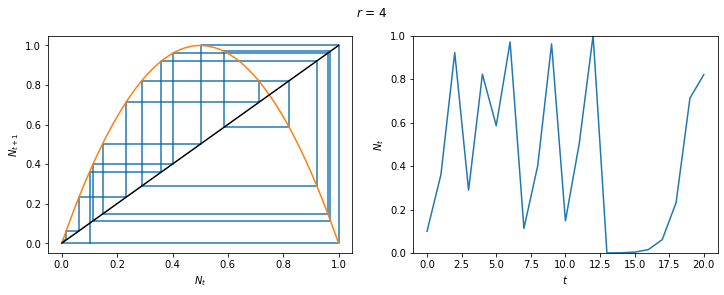

In [7]:
# シミュレーションと図示

T = 20 #シミュレーションの終了時刻
xi = 0.1 #初期条件
r = 4 #パラメータrの値

sim_and_plot(r, xi, T)

In [8]:
# インターラクティブ表示
T = 20 #シミュレーションの終了時刻
xi = 0.1 #初期条件

interact(lambda r: sim_and_plot(r, xi, T), r=(2.8, 4, 0.01));

interactive(children=(FloatSlider(value=3.4, description='r', max=4.0, min=2.8, step=0.01), Output()), _dom_cl…

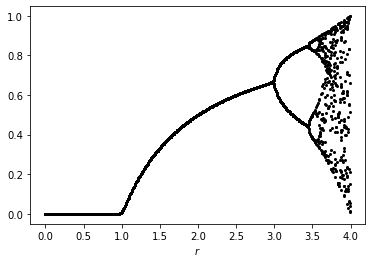

In [9]:
# 分岐図
for r in np.arange(0, 4, 0.01):
  T = 100
  Te = 10
  plt.plot(r*np.ones(Te), sim(r, xi, T)[-Te:], "o", c="k", markersize=2)
plt.xlabel("$r$")
plt.show()

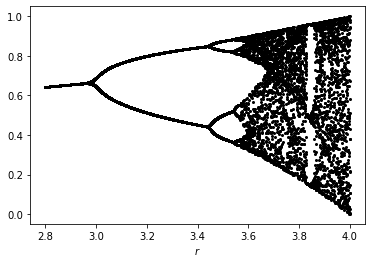

In [10]:
for r in np.arange(2.8, 4, 0.001):
  T = 100
  Te = 10
  plt.plot(r*np.ones(Te), sim(r, xi, T)[-Te:], "o", c="k", markersize=2)
plt.xlabel("$r$")
plt.show()

初期値鋭敏性

Text(0, 0.5, '$N_t$')

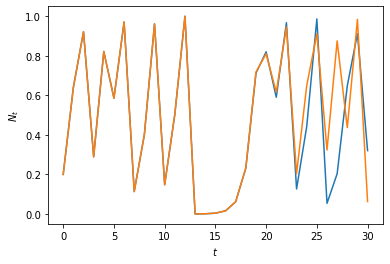

In [35]:
T = 30 #シミュレーションの終了時刻
xi = 0.2 #初期条件
r = 4 #パラメータrの値
eps = 1e-8
x1 = sim(r, xi, T)
x2 = sim(r, xi+eps, T)

# 図示
fig, ax = plt.subplots()
plt.plot(np.arange(T+1), x1)
plt.plot(np.arange(T+1), x2)
ax.set_xlabel("$t$")
ax.set_ylabel("$N_t$")


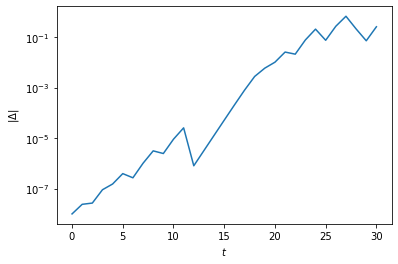

In [61]:
# 初期のずれの増大
fig, ax = plt.subplots()
plt.plot(np.arange(T+1), abs(x1-x2))
ax.set_xlabel("$t$")
ax.set_yscale('log')
ax.set_ylabel("|$\Delta$|")
plt.show()

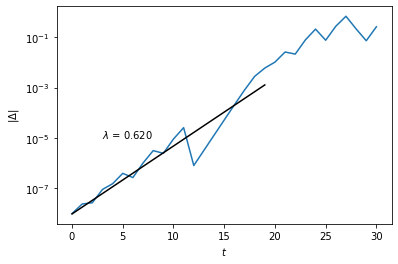

In [65]:
# 初期のずれの増大
fig, ax = plt.subplots()
plt.plot(np.arange(T+1), abs(x1-x2))
ax.set_xlabel("$t$")
ax.set_yscale('log')
ax.set_ylabel("|$\Delta$|")

T1 = 20
param, _ = curve_fit(lambda x, a, b: a*x+b, np.arange(T1), np.log(abs(x1-x2))[:20])
lamb, b = param
plt.plot(np.arange(T1), np.exp(lamb*np.arange(T1))*np.exp(b), c="k")
plt.text(3, 1e-5, f"$\lambda$ = {a:.3f}")
plt.show()